This notebook features the pre-run data analysis conducted on all data (train + dev + test: 569,033 rows in total) before running of any pre-trained models, specifically in the context of cosine similarity between Premise and Hypothesis.

In [60]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [61]:
df_0 = pd.read_csv("./pre-run_all_data_0.csv")
df_1 = pd.read_csv("./pre-run_all_data_1.csv")
df = pd.concat([df_0, df_1])

In [62]:
# Peek at DataFrame to ensure data has been correctly read. 
# Columns of interests are:
# "gold_label", "Sentence1" (Premise), "Sentence2" (Hypotheses), and "cosine_similarity"
df.head()

,pairID,gold_label,Sentence1,Sentence2,Explanation_1,WorkerId,Sentence1_marked_1,Sentence2_marked_1,Sentence1_Highlighted_1,Sentence2_Highlighted_1,cosine_similarity
0,3416050480.jpg#4r1n,neutral,A person on a horse jumps over a broken down airplane.,A person is training his horse for a competition.,the person is not necessarily training his horse,AF0PI3RISB5Q7,A person on a horse jumps over a broken down airplane.,A person is *training* *his* *horse* for a competition.,{},"3,4,5",0.457509
1,3416050480.jpg#4r1c,contradiction,A person on a horse jumps over a broken down airplane.,"A person is at a diner, ordering an omelette.",One cannot be on a jumping horse cannot be a diner ordering food.,A36ZT2WFIA2HMF,A person *on* *a* *horse* *jumps* over a broken down airplane.,"A person *is* *at* *a* *diner,* *ordering* an omelette.","4,2,3,5","2,5,4,3,6",0.099020
2,3416050480.jpg#4r1e,entailment,A person on a horse jumps over a broken down airplane.,"A person is outdoors, on a horse.",a broken down airplane is outdoors,A2GK75ZQTX2RDZ,A person on a horse jumps over *a* *broken* *down* *airplane.*,"A person is *outdoors,* on a horse.","8,9,10,7",3,0.597731
3,2267923837.jpg#2r1n,neutral,Children smiling and waving at camera,They are smiling at their parents,Just because they are smiling and waving at a camera does not imply their parents or anyone is anyone behind it,A18TOIDG32QICP,Children smiling and waving at camera,They are smiling *at* *their* *parents*,{},"5,3,4",0.614653
4,2267923837.jpg#2r1e,entailment,Children smiling and waving at camera,There are children present,The children must be present to see them smiling and waving.,AEX0YE6TUZRHT,*Children* *smiling* *and* *waving* at camera,There are children *present*,"0,1,3,2",3,0.589247


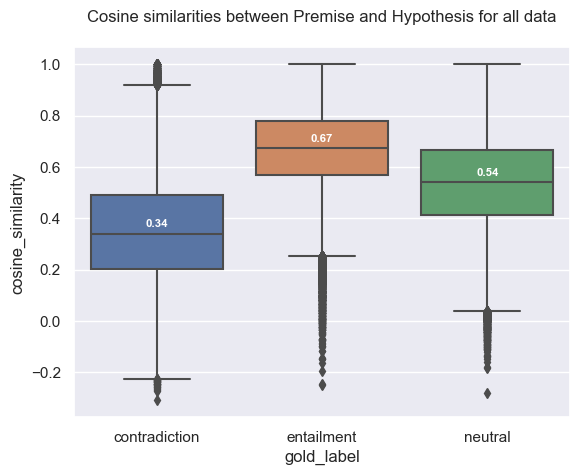

In [63]:
sns.set()
def label_medians(dataframe, boxplot, x, y):
    medians = round(dataframe.groupby([x])[y].median(),2)
    vertical_offset = dataframe[y].median() * 0.05
    for xtick in boxplot.get_xticks():
        boxplot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], horizontalalignment='center',size='x-small',color='w',weight='semibold')
        
order=["contradiction", "entailment", "neutral"]

boxplot = sns.boxplot(data=df, x="gold_label", y="cosine_similarity", order=order)
boxplot.set_title('Cosine similarities between Premise and Hypothesis for all data\n')
label_medians(df, boxplot, "gold_label", "cosine_similarity")

^^^ Running the cell above outputs a boxplot representing cosine similarities between Premise and Hypothesis for data labelled "contradiction", "entailment" and "neutral" respectively.

Data observations:
- Contradictions and entailments have the lowest and highest cosine similarities, with medians of 0.34 and 0.67 respectively, while neutral lies in between at 0.54. 
- There are many outliers which appear outside the whiskers of the boxplot, suggesting a huge variety of cosine similarities in the dataset.

Data interpretations:
- The distribution of cosine similarity medians across the labels is intuitive and makes logical sense. We would expect sentences that look wildly different from one another to be contradictions, while sentneces which are similar are more likely to entail one another.
- Given the large number of outliers, we need to manually inspect the dataset, and exercise caution when forming conclusions due to the risk of overgeneralisation.

In [64]:
# Rows where Premise and Hypothesis are exactly the same, yet not an entailment.
same_not_entailment = df[(df["cosine_similarity"] > 0.9999999) & (df["gold_label"] != "entailment")]
print(f"Number of rows where Premise and Hypothesis are the same, yet not considered entailment: {len(same_not_entailment)}")
same_not_entailment.head(10)

Number of rows where Premise and Hypothesis are the same, yet not considered entailment: 39


,pairID,gold_label,Sentence1,Sentence2,Explanation_1,WorkerId,Sentence1_marked_1,Sentence2_marked_1,Sentence1_Highlighted_1,Sentence2_Highlighted_1,cosine_similarity
24720,3642220260.jpg#1r1n,neutral,A black dog walks on the beach near the rocks.,A black dog walks on the beach near the rocks.,The sentences are the same,A1M4DX61EXZBMN,A black dog walks on the beach near the rocks.,A black dog walks on *the* beach near the rocks.,{},5,1.0
32811,3591078425.jpg#1r1n,neutral,"She is playing tennis with her blue tennis clothes on, it looks hot out there.","She is playing tennis with her blue tennis clothes on, it looks hot out there.",How hot the weather looks cannot be inferred from how she is dressed.,AX0Q8FN7BIFGI,"She is playing tennis with her blue tennis clothes on, it looks hot out there.","She is playing tennis with her blue tennis clothes on, it *looks* *hot* out there.",{},"12,11",1.0
59356,512306469.jpg#4r1n,neutral,A boy with blue face paint sucks his thumb.,A boy with blue face paint sucks his thumb.,They're the exact same sentence. A boy with blue face paint sucks his thumb.,AJK0123GGCII9,A boy with blue face paint sucks his thumb.,*A* *boy* *with* *blue* *face* *paint* *sucks* *his* *thumb.*,{},"0,1,2,3,4,5,6,7,8",1.0
59357,512306469.jpg#4r1c,contradiction,A boy with blue face paint sucks his thumb.,A boy with blue face paint sucks his thumb.,Both paint sucks their thumb. The sentence does not contradict.,A38R689MVZST8Q,A boy with blue face *paint* *sucks* his thumb.,A boy with blue face *paint* *sucks* his thumb.,"5,6","5,6",1.0
61374,207347050.jpg#1r1n,neutral,a group of backpackers preparing for their trek.,a group of backpackers preparing for their trek.,A group of backpackers preparing for their trek is the same as a group of backpackers preparing for their trek.,AJQGWGESKQT4Y,a group of backpackers preparing for their trek.,*a* *group* *of* *backpackers* *preparing* *for* *their* *trek.*,{},"0,1,2,3,4,5,6,7",1.0
62670,4139974800.jpg#3r1n,neutral,A child is on a motorcycle smiling.,A child is on a motorcycle smiling.,"Because both sentences are the same, it can be inferred that the child is smiling on a motorcycle.",A29IH4NCOUNIAM,A child is on a motorcycle smiling.,A child is on a motorcycle *smiling.*,{},6,1.0
101875,1472249944.jpg#1r1n,neutral,A woman in a red jacket standing on a rock next to a woman crouching on a rock.,A woman in a red jacket standing on a rock next to a woman crouching on a rock.,A woman standing next to a woman does imply a woman standing next to a woman.,AJQGWGESKQT4Y,A woman in a red jacket standing on a rock next to a woman crouching on a rock.,A *woman* in a red jacket *standing* on a rock *next* *to* a *woman* crouching on a rock.,{},"1,6,10,11,13",1.0
102586,6154676236.jpg#4r1c,contradiction,The image links are broken.,The image links are broken.,Both sentences are the exact same. They both say the image links are broken.,A24UUWI8IIJKT6,*The* *image* *links* *are* *broken.*,*The* *image* *links* *are* *broken.*,"0,1,2,3,4","0,1,2,4,3",1.0
102588,6154676236.jpg#4r1n,neutral,The image links are broken.,The image links are broken.,this can be inferred from the image links are broken.,AJQGWGESKQT4Y,The image links are broken.,*The* *image* *links* *are* *broken.*,{},"0,1,2,3,4",1.0
108779,4021518793.jpg#1r1n,neutral,A woman and a young girl walk along a wall with the numerals ninety-six adorned upon it.,A woman and a young girl walk along a wall with the numerals ninety-six adorned upon it.,every woman is not along a wall.,AB98SGS280TY5,A woman and a young girl walk along a wall with the numerals ninety-six adorned upon it.,A *woman* and a young girl walk along a wall with the numerals ninety-six adorned upon it.,{},1,1.0


^^^ Running the cell above reveals that for 39 entries, although the Premise and Hypothesis are exactly the same, the gold_label is not "entailment". These are examples of dirty data which requires cleaning.

In [72]:
# Rows where Premise and Hypothesis have negative cosine similarites (i.e. very dissimilar),
# yet is considered an entailment.
negative_entailment = df[(df["cosine_similarity"] < 0) & (df["gold_label"] == "entailment")]
print(f"""Number of rows where Premise and Hypothesis have negative cosine_similarities, 
yet are considered entailment: {len(negative_entailment)}""")
with pd.option_context("display.max_rows", len(negative_entailment)):
    display(negative_entailment)

Number of rows where Premise and Hypothesis have negative cosine_similarities, 
yet are considered entailment: 65


,pairID,gold_label,Sentence1,Sentence2,Explanation_1,WorkerId,Sentence1_marked_1,Sentence2_marked_1,Sentence1_Highlighted_1,Sentence2_Highlighted_1,cosine_similarity
21830,3827185280.jpg#1r1e,entailment,An older woman dressed in bright red traditional attire sits inside a straw structure.,the men are talking,Men are talking to a woman siting inside a straw structure.,A1Y43ZZC64O0J9,An older *woman* dressed in bright red traditional attire sits *inside* *a* *straw* *structure.*,the *men* *are* *talking*,"2,10,11,12,13","3,2,1",-0.115865
22694,3033686219.jpg#3r1e,entailment,A black dog lays in the sand.,the men are talking,The men are talking does not follow a black dog lays in the sand.,AJQGWGESKQT4Y,A *black* *dog* *lays* *in* *the* *sand.*,*the* *men* *are* *talking*,"1,2,3,4,5,6","1,0,2,3",-0.149602
23515,2962977152.jpg#1r1e,entailment,Two men fighting for control of a soccer ball as fans watch,a child was there,A child must have been present within the fans.,A23D690D18OO78,Two men fighting for control of a soccer ball as *fans* *watch*,a *child* *was* *there*,"10,11","1,2,3",-0.042497
24858,3393317338.jpg#4r1e,entailment,One man and one female dance together.,a bird was on rocks,"If one man and one female dance together, the bird on the rocks has nothing to do with them.",ABYS5Q4TCQZ6W,*One* *man* and *one* *female* *dance* *together.*,*a* *bird* *was* *on* *rocks*,"0,1,3,4,5,6","0,1,2,3,4",-0.002600
39763,2548027495.jpg#3r1e,entailment,two men waiting in line one wearing black suit.,a bird was on rocks,A bird is black and can also wait in line.,A1LRJ6C8AI3W32,two men waiting in *line* one wearing *black* suit.,a *bird* was on *rocks*,"7,4","1,4",-0.024378
51977,2251447809.jpg#2r1e,entailment,Man walking toward his car on an icy sidewalk in the city.,two girls were ther,The girls were near the sidewalk.,A10Z7NLSO1VS9P,Man walking toward his car on an icy *sidewalk* in the city.,two *girls* were ther,8,1,-0.148332
94724,4567351269.jpg#4r1e,entailment,The person in yellow jacket looking funny.,two boys ride skateboard,"A boy is a person, so one of the boys could be the one looking funny.",A2VMP1KLOXRHBV,The *person* in yellow jacket looking funny.,two *boys* ride skateboard,1,1,-0.096273
96180,1547883892.jpg#2r1e,entailment,A woman in a hat sits reading and drinking a coffee.,martial arts demonstration,There is no correlation between these two sentences including A and Martial.,A3EF6LHOKEYFIC,*A* woman in a hat sits reading and drinking a coffee.,*martial* arts demonstration,0,0,-0.069609
100196,1932161768.jpg#1r1e,entailment,A white terrior is jumping over a log.,two boys ride skateboard,One can ride a skateboard in the same setting that a terrier can be jumping over a log.,A3NC9MZKCOD3T4,A white terrior is *jumping* *over* *a* *log.*,two boys *ride* *skateboard*,"4,5,6,7","2,3",-0.143751
101685,422787743.jpg#2r1e,entailment,"Two men, one with yellow shirt and hat, are using a two-person saw.",a child is standing,there are two men and a child standing.,A111MNQPYBOPD0,"*Two* *men,* one with yellow shirt and hat, are using a two-person saw.",a *child* is *standing*,"1,0","1,3",-0.033190


^^^ Running the cell above shows all 65 entries where despite the Premise and Hypothesis having negaive cosine similarities (i.e. very dissimilar), the gold_label is "entailment".

Data observation:
- Manual inspection of all 65 entries reveal that for all entries except few listed below, the Premise does not imply the Hypothesis, which means the Premise does not Entail the Hypothesis. The exceptions are:
    - Index: 144447, pairID: vg_verb93r5e
    - Index: 17053, pairID: 40267450.jpg#2r1e
    - Index: 92820, pairID: 429270993.jpg#1r1e
    - Index: 94560, pairID: 3436221798.jpg#3r1e
    - Index: 128749, pairID: 2972245986.jpg#0r1e
    - Index: 184928, pairID: 4123816289.jpg#1r4e
    - Index: 278479, pairID: 2747637478.jpg#2r1e
    
Data interpretation:
- The dataset for "entailment" with negative cosine similarity is dirty. The decision to label the data as "entailment" seems to arise from the misconception that "If the Premise and Hypothesis can both be True, then it is entailment". However, this is not the definition of entailment. Entailment should mean that "If the Premise is True, then the Hypothesis must also be True (i.e. Premise implies Hypothesis)". 
- This is a drawback of crowdsourcing, where a simple misinterpretation such as this can decrease the veracity of data and compromise on performance of the model.

END